In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.lines import Line2D

my_range = range(0,51)

In [2]:
#reading in the state abbreviations
path = 'input_data/google_trends_data/statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.tail(25)

,State,Abbrev,Code
26,Montana,Mont.,MT
27,Nebraska,Nebr.,NE
28,Nevada,Nev.,NV
29,New Hampshire,N.H.,NH
30,New Jersey,N.J.,NJ
31,New Mexico,N.M.,NM
32,New York,N.Y.,NY
33,North Carolina,N.C.,NC
34,North Dakota,N.D.,ND
35,Ohio,Ohio,OH


In [3]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [4]:
#list for state names
state_names = [x for x in statesAbbrev_df['State']]
len(state_names)

51

In [5]:
#creating a df dict to hold the state dfs, reading in the dfs
states_df_dict = {}
for x in my_range:
    path = f'input_data/states_combined_data/US-{state_codes[x]}_cat_data.csv'
    states_df_dict[f'{state_codes[x]}_data_df'] = [pd.read_csv(path)]
states_df_dict

{'AL_data_df': [           time  arts_entertainment  autos  beauty_fitness  books_lit  \
  0    2019-01-06                  80     71              76         73   
  1    2019-01-13                  80     73              78         82   
  2    2019-01-20                  75     73              73         82   
  3    2019-01-27                  74     72              73         79   
  4    2019-02-03                  76     74              77         84   
  ..          ...                 ...    ...             ...        ...   
  98   2020-11-22                  65     66              64         48   
  99   2020-11-29                  66     69              71         61   
  100  2020-12-06                  67     69              68         61   
  101  2020-12-13                  67     68              70         56   
  102  2020-12-20                  72     66              74         49   
  
       action_adventure  campaigns_elections  celebs  discrimination  \
  0        

In [6]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['AL_data_df', 'AK_data_df', 'AZ_data_df', 'AR_data_df', 'CA_data_df', 'CO_data_df', 'CT_data_df', 'DE_data_df', 'DC_data_df', 'FL_data_df', 'GA_data_df', 'HI_data_df', 'ID_data_df', 'IL_data_df', 'IN_data_df', 'IA_data_df', 'KS_data_df', 'KY_data_df', 'LA_data_df', 'ME_data_df', 'MD_data_df', 'MA_data_df', 'MI_data_df', 'MN_data_df', 'MS_data_df', 'MO_data_df', 'MT_data_df', 'NE_data_df', 'NV_data_df', 'NH_data_df', 'NJ_data_df', 'NM_data_df', 'NY_data_df', 'NC_data_df', 'ND_data_df', 'OH_data_df', 'OK_data_df', 'OR_data_df', 'PA_data_df', 'RI_data_df', 'SC_data_df', 'SD_data_df', 'TN_data_df', 'TX_data_df', 'UT_data_df', 'VT_data_df', 'VA_data_df', 'WA_data_df', 'WV_data_df', 'WI_data_df', 'WY_data_df'])

In [7]:
col_names = list(states_df_dict[f'{state_codes[39]}_data_df'][0].columns)
len(col_names)

25

In [8]:
col_names_for_max = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]
len(col_names_for_max)

21

In [9]:
times_list = list(states_df_dict[f'{state_codes[39]}_data_df'][0]['time'])
len(times_list)

103

In [ ]:
def tvfilm_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['action_adventure'], color='red', label='Action/Adventure')

    ax.plot(graphs_time_list, data_2020_df['scifi_fantasy'], color='orange', label='SciFi Fantasy')

    ax.plot(graphs_time_list, data_2020_df['tv_shows'], color='purple', label='TV Shows')

    ax.plot(graphs_time_list, data_2020_df['online_vids'], color='green', label='Online Video')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group TV/Film vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay At Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.savefig(f'../perry/output_graphs/Popularity_TVFilm/{state_names[ind_no]}.png') 
    plt.show()

In [ ]:
for x in my_range:
    tvfilm_graph_maker(x)
    

In [ ]:
def comms_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['mobiles'], color='red', label='Mobiles')

    ax.plot(graphs_time_list, data_2020_df['voice_vid_chat'], color='purple', label='Voice/Video Chat')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Communication vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_Communication/{state_names[ind_no]}.png') 
    plt.show()
    
    plt.show()

In [ ]:
for x in my_range:
    comms_graph_maker(x)

In [ ]:
def health_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['infectious_diseases'], color='orange', label='Infectious Diseases')

    ax.plot(graphs_time_list, data_2020_df['health_news'], color='brown', label='Health News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Health vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_Health/{state_names[ind_no]}.png') 
    
    plt.show()


In [ ]:
for x in my_range:
    health_graph_maker(x)

In [ ]:
def ent_other_gc_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['games_systems_consoles'], color='red', label='Games, Systems, Consoles')

    ax.plot(graphs_time_list, data_2020_df['lottos'], color='green', label='Lottery & Sweepstakes')
    
    ax.plot(graphs_time_list, data_2020_df['celebs'], color='brown', label='Celebrity News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Other Entertainment (Games & Celebs) vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    fig.savefig(f'../perry/output_graphs/Popularity_OtherEntertainment/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in my_range:
    ent_other_gc_graph_maker(x)

In [ ]:
def ent_other_gen_med_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['arts_entertainment'], color='orange', label='Arts & Entertainment')

    ax.plot(graphs_time_list, data_2020_df['books_lit'], color='purple', label='Books & Lit')
    
    ax.plot(graphs_time_list, data_2020_df['entertainment_media'], color='cyan', label='Entertainment Media')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Other Entertainment (General & Media) vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_GeneralEntertainment/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in my_range:
    ent_other_gen_med_graph_maker(x)

In [ ]:
def election_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]

    print(data_2020_df['campaigns_elections'].mean())
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['campaigns_elections'], color='red', label='Campaigns & Elections')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Campaigns & Election vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='best')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_Election/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in my_range:
    election_graph_maker(x)

In [ ]:
def discrim_law_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))

    ax.plot(graphs_time_list, data_2020_df['discrimination'], color='mediumslateblue', label='Discrimination')

    ax.plot(graphs_time_list, data_2020_df['law_enf'], color='deeppink', label='Law Enforcement')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Discrimination/Law Enforcement vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_DiscriminationLaw/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in my_range:
    discrim_law_graph_maker(x)

In [ ]:
def misc_full_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))
    
    ax.plot(graphs_time_list, data_2020_df['discrimination'], color='purple', label='Discrimination')

    ax.plot(graphs_time_list, data_2020_df['law_enf'], color='green', label='Law Enforcement')

    ax.plot(graphs_time_list, data_2020_df['weather'], color='red', label='Weather')

    ax.plot(graphs_time_list, data_2020_df['autos'], color='orange', label='Autos')

    ax.plot(graphs_time_list, data_2020_df['beauty_fitness'], color='brown', label='Beauty & Fitness')

    ax.plot(graphs_time_list, data_2020_df['sport_news'], color='cyan', label='Sports News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Miscellaneous (larger) vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases', color='blue')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='upper left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_Misc/{state_names[ind_no]}.png') 
    
    plt.show()

In [ ]:
for x in my_range:
    misc_full_graph_maker(x)

In [ ]:
def misc_select_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x[5:] for x in data_2020_df['time']]
    init_covid_list = [x for x in data_2020_df['covid_cases']]
    
    fig, ax = plt.subplots(figsize=(20,7))
    
    ax.plot(graphs_time_list, data_2020_df['weather'], color='red', label='Weather')

    ax.plot(graphs_time_list, data_2020_df['autos'], color='lime', label='Autos')

    ax.plot(graphs_time_list, data_2020_df['beauty_fitness'], color='fuchsia', label='Beauty & Fitness')

    ax.plot(graphs_time_list, data_2020_df['sport_news'], color='cyan', label='Sports News')

    plt.xticks(graphs_time_list, rotation=90)

    plt.xlabel('Date')
    plt.ylabel('Popularity (%)')
    plt.legend(loc='best')
    plt.title(f'{state_names[ind_no]}: Category Popularity in Group Miscellaneous vs Covid Cases, during 2020')

    ax2 = ax.twinx()
    colour_list = []
    for x in data_2020_df['stay_at_home']:
        if x == True:
            colour_list.append('green')
        else:
            colour_list.append('blue')
    ax2.set_ylabel('Covid Cases')  
    ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
    ax2.tick_params(axis='y')
    
    custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    ax2.legend(custom_lines, ['Stay at Home in Effect', 'No Stay at Home'], loc='lower left')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    fig.savefig(f'../perry/output_graphs/Popularity_SelectedMisc/{state_names[ind_no]}.png') 
    
    plt.show()


In [ ]:
for x in my_range:
    misc_select_graph_maker(x)

In [10]:
means_agg = 0
means_2019 = 0
means_2020 = 0 

for x in range(0,51):
    current_df = states_df_dict[f'{state_codes[x]}_data_df'][0].fillna(0)
    means_agg += current_df.mean() / 51
    means_2019 += current_df.iloc[:52, :].mean() / 51
    means_2020 += current_df.iloc[52:, :].mean() / 51

# means_agg = means_agg.iloc[:22].astype(int)
# means_2019 = means_agg.iloc[:22].astype(int)
# means_2020 = means_agg.iloc[:22].astype(int)



In [11]:
#means by group, agg
tv_film_mean_agg = means_agg.loc[['action_adventure','scifi_fantasy','tv_shows','online_vids']].mean()
comms_mean_agg = means_agg.loc[['mobiles','voice_vid_chat']].mean()
health_mean_agg = means_agg.loc[['infectious_diseases','health_news']].mean()
ent_other_mean_agg = means_agg.loc[['games_systems_consoles','lottos','celebs']].mean()
elections_mean_agg = means_agg.loc[['campaigns_elections']].mean()
misc_mean_agg = means_agg.loc[['law_enf','weather','autos','beauty_fitness','sport_news']].mean()


In [12]:
#means by goup, 2019
tv_film_mean_2019 = means_2019.loc[['action_adventure','scifi_fantasy','tv_shows','online_vids']].mean()
comms_mean_2019 = means_2019.loc[['mobiles','voice_vid_chat']].mean()
health_mean_2019 = means_2019.loc[['infectious_diseases','health_news']].mean()
ent_other_mean_2019 = means_2019.loc[['games_systems_consoles','lottos','celebs']].mean()
elections_mean_2019 = means_2019.loc[['campaigns_elections']].mean()
misc_mean_2019 = means_2019.loc[['law_enf','weather','autos','beauty_fitness','sport_news']].mean()

In [13]:
#means by goup, 2020
tv_film_mean_2020 = means_2020.loc[['action_adventure','scifi_fantasy','tv_shows','online_vids']].mean()
comms_mean_2020 = means_2020.loc[['mobiles','voice_vid_chat']].mean()
health_mean_2020 = means_2020.loc[['infectious_diseases','health_news']].mean()
ent_other_mean_2020 = means_2020.loc[['games_systems_consoles','lottos','celebs']].mean()
elections_mean_2020 = means_2020.loc[['campaigns_elections']].mean()
misc_mean_2020 = means_2020.loc[['law_enf','weather','autos','beauty_fitness','sport_news']].mean()

In [14]:
#reorg data for graphing
subcat_agg_df = pd.DataFrame(means_agg.iloc[:21],columns=['Mean'])
print(subcat_agg_df)

sub_labels = ['arts entertainment', 'autos', 'beauty fitness', 'books lit', 'action adventure' 
            'campaigns elections', 'celebs','discrimination','entertainment media',
            'games systems consoles','health news','infectious diseases','law enf','lottos', 
            'mobiles','online vids', 'scifi fantasy','sport news','tv shows','voice vid chat',
            'weather']
len(sub_labels)

                             Mean
arts_entertainment      84.631829
autos                   75.410051
beauty_fitness          81.436703
books_lit               70.049496
action_adventure        67.121074
campaigns_elections      1.695222
celebs                  59.845231
discrimination          25.229773
entertainment_media     68.856844
games_systems_consoles  53.610318
health_news             49.530364
infectious_diseases     16.899105
law_enf                 48.839140
lottos                  51.195317
mobiles                 60.204645
online_vids             78.413288
scifi_fantasy           52.382067
sport_news              55.974491
tv_shows                79.063773
voice_vid_chat          48.415762
weather                 47.954883


20

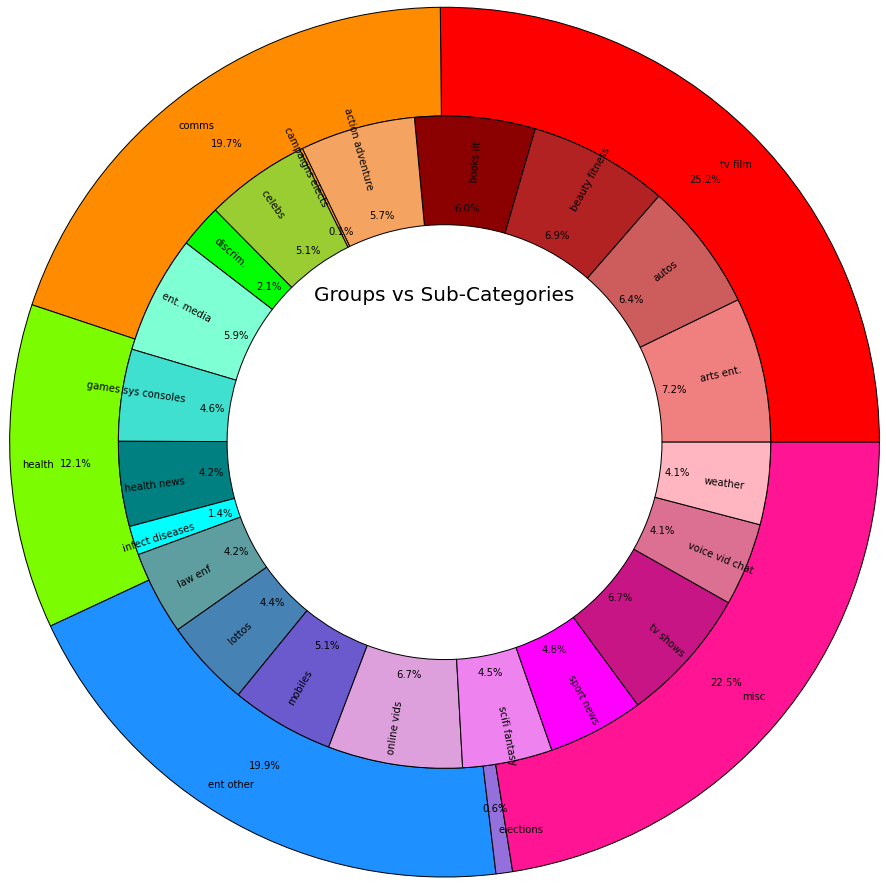

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

size = 1
ax.set_title('Groups vs Sub-Categories',fontsize=20)

colours = ['red', 'darkorange', 'lawngreen', 'dodgerblue', 'mediumpurple', 'deeppink']
labels = ['tv film', 'comms', 'health', 'ent other', 'elections', 'misc']
data = [tv_film_mean_agg, comms_mean_agg, 
        health_mean_agg, ent_other_mean_agg, 
        elections_mean_agg, misc_mean_agg]
ax.pie(x = data, radius=4, labels=labels, labeldistance=.9, pctdistance=.85,colors=colours, wedgeprops=dict(width=size, edgecolor='black'), autopct='%1.1f%%')


sub_colours = ['lightcoral', 'indianred', 'firebrick', 'darkred', 'sandybrown', 'orange', 'yellowgreen', 'lime', 'aquamarine', 'turquoise', 'teal', 'cyan', 'cadetblue', 'steelblue', 'slateblue', 'plum', 'violet', 'magenta', 'mediumvioletred', 'palevioletred', 'lightpink']
sub_labels = ['arts ent.', 'autos', 'beauty fitness', 'books lit', 'action adventure', 
            'campaigns elects', 'celebs    ','discrim.','ent. media',
            'games sys consoles','health news','infect diseases','law enf','lottos', 
            'mobiles','online vids', '  scifi fantasy','sport news','   tv shows','voice vid chat','weather']



sub_data = [x for x in subcat_agg_df['Mean']]
ax.pie(x = sub_data, radius=(3),pctdistance=.72,labels=sub_labels, labeldistance=0.8, colors=sub_colours, rotatelabels=True, wedgeprops=dict(width=size, edgecolor='black'), autopct='%1.1f%%')

ax.set(aspect="equal")

fig.savefig(f'../perry/output_graphs/Pie_Charts/Group_SubGroup.png',bbox_inches='tight',dpi=100)

plt.show()


 

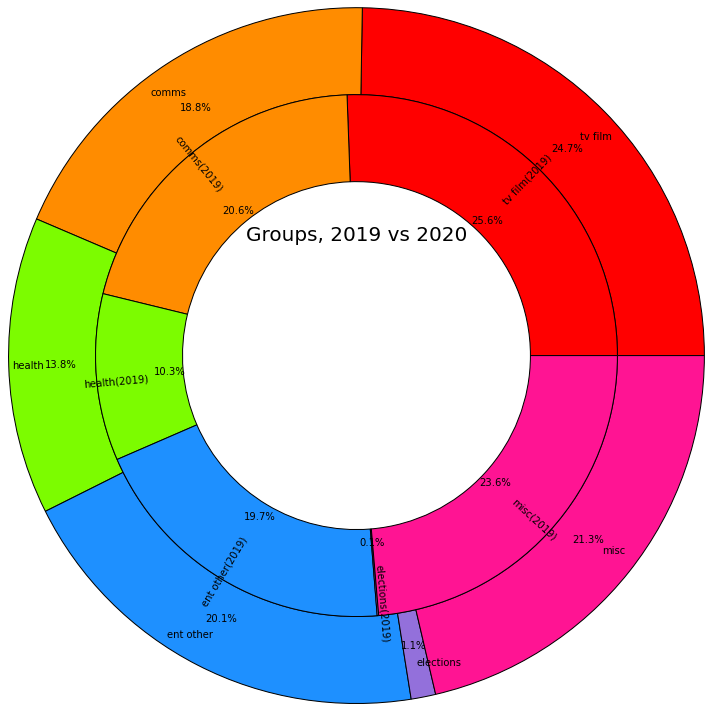

In [29]:
#Group categories, 2019 vs 2020

fig, ax = plt.subplots()

size = 1
ax.set_title('Groups, 2019 vs 2020',fontsize=20)

colours = ['red', 'darkorange', 'lawngreen', 'dodgerblue', 'mediumpurple', 'deeppink']
labels = ['tv film', 'comms', 'health', 'ent other', 'elections', 'misc']
data = [tv_film_mean_2020, comms_mean_2020, 
        health_mean_2020, ent_other_mean_2020, 
        elections_mean_2020, misc_mean_2020]
ax.pie(x = data, radius=4,labels=labels, labeldistance=.9, pctdistance=.85,colors=colours, wedgeprops=dict(width=size, edgecolor='black'), autopct='%1.1f%%')


sub_colours = ['red', 'darkorange', 'lawngreen', 'dodgerblue', 'mediumpurple', 'deeppink']
sub_labels = ['tv film(2019)', 'comms(2019)', 'health(2019)', 
              'ent other(2019)', 'elections(2019)', 'misc(2019)']

sub_data = [tv_film_mean_2019, comms_mean_2019, 
            health_mean_2019, ent_other_mean_2019, 
            elections_mean_2019, misc_mean_2019]

ax.pie(x = sub_data, radius=(3), pctdistance=.72,labels=sub_labels, labeldistance=0.8, colors=sub_colours, rotatelabels=True, wedgeprops=dict(width=size, edgecolor='black'), autopct='%1.1f%%')

ax.set(aspect="equal")

fig.savefig(f'../perry/output_graphs/Pie_Charts/Group_Nested_agg.png',bbox_inches='tight',dpi=100)

plt.show()